In [1]:
import sys
sys.path.append('..')
sys.path.append('../..')

In [2]:
import json
import matplotlib.pyplot as plt
from util.plot_optuna_results import load_trial_stats

In [ ]:
data = {
    'subj': {
        'gan-1': load_trial_stats('../optuna/stats/subj/study-ganaug-subj-1layer-trial-0.json'),
        'gan-4': load_trial_stats('../optuna/stats/subj/study-gantext-subj-trial-0.json'),
        'sim-1': load_trial_stats('../optuna/stats/subj/basic-1layer-subj-20epochs.json'),
        'sim-4': load_trial_stats('../optuna/stats/subj/basic-4layer-subj-20epochs.json')
    },
    'aclImdb': {
        'gan-1': load_trial_stats('../optuna/stats/aclImdb/study-gantext-aclimdb-trial-0-1layer.json'),
        'gan-4': load_trial_stats('../optuna/stats/aclImdb/study-gantext-aclimdb-trial-0-4layers.json'),
        'sim-1': load_trial_stats('../optuna/stats/aclImdb/basic-1layer-aclImdb-20epochs.json'),
        'sim-4': load_trial_stats('../optuna/stats/aclImdb/basic-4layer-aclImdb.json')
    },
    'rotten400k': {
        'gan-1': load_trial_stats('../optuna/stats/rotten400k/study-ganaug-rotten400k-1layer-trial-0.json'),
        'gan-4': load_trial_stats('../optuna/stats/rotten400k/study-ganaug-rotten400k-4layer-trial-6.json'),
        'sim-1': load_trial_stats('../optuna/stats/rotten400k/basic-1layer-rotten400k.json'),
        'sim-4': load_trial_stats('../optuna/stats/rotten400k/basic-4layer-rotten400k.json')
    }
}

In [3]:
def plot_metric(dataset_result, metric, file=None):
    labels = []
    for key, value in dataset_result.items():
        labels.append(key)
        epochs = [x['epoch'] for x in value]
        metric_values = [x[metric] for x in value]
        plt.plot(epochs, metric_values)
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.legend(labels)

    if file:
        plt.savefig(file)

    plt.show()

In [ ]:
plot_metric(data['subj'], 'Valid. Accur.', file='../img/subj-acc-6epochs.pdf')

In [ ]:
plot_metric(data['aclImdb'], 'Valid. Accur.', file='../img/aclImdb-acc-6epochs.pdf')

In [ ]:
plot_metric(data['rotten400k'], 'Valid. Accur.', file='../img/rotten400k-acc-6epochs.pdf')

In [ ]:
plot_metric(data['rotten400k'], 'Valid. Loss')

In [ ]:
data_aug_eda = {
    'subj': {
        'sim': load_trial_stats('../optuna/stats/subj/basic-1layer-subj-20epochs.json'),
        'sim-eda-1': load_trial_stats('../optuna/stats/subj/aug/basic-1layer-subj-1aug-trial-1.json'),
        'sim-eda-9': load_trial_stats('../optuna/stats/subj/aug/basic-1layer-subj-9aug.json'),
        'gan': load_trial_stats('../optuna/stats/subj/study-ganaug-subj-1layer-trial-0.json'),
        'gan-eda-1': load_trial_stats('../optuna/stats/subj/aug/study-ganaug-subj-1layer-1aug-trial-0.json'),
        'gan-eda-9': load_trial_stats('../optuna/stats/subj/aug/study-ganaug-subj-1layer-9aug-trial-0.json')
    }
}

In [ ]:
plot_metric(data_aug_eda['subj'], 'Valid. Accur.', file='../img/gantext-eda-acc.pdf')

In [ ]:
plot_metric(data_aug_eda['subj'], 'Valid. Loss', file='../img/gantext-eda-loss.pdf')

# Labeled vs Unlabeled

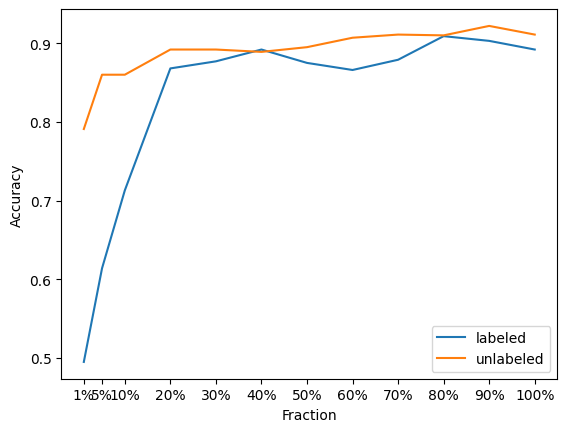

In [30]:
with open('../core/stats/subj/unlabeled/label-vs-unlabel.json', 'r') as f:
    data = json.load(f)

x = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
y_label = list(data['labeled'].values())
y_unlabeled = list(data['unlabeled'].values())
plt.plot(x, y_label)
plt.plot(x, y_unlabeled)
plt.xticks(x, [str(int(100*i)) + '%' for i in x])
plt.legend(['labeled', 'unlabeled'])
plt.xlabel('Fraction')
plt.ylabel('Accuracy')
plt.savefig('../img/label-vs-unlabel.pdf')
plt.show()

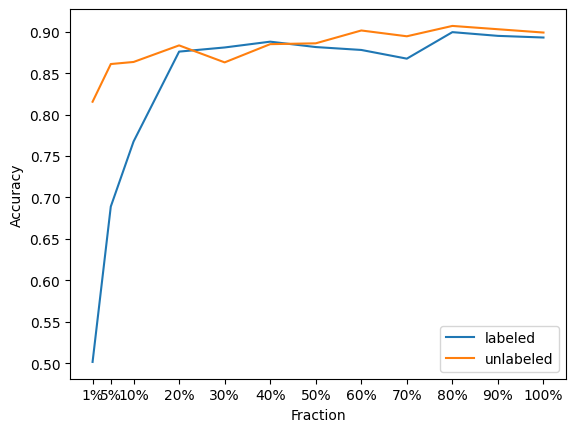

In [34]:
with open('../core/stats/subj/unlabeled/label-vs-unlabel-2.json', 'r') as f:
    data2 = json.load(f)

x = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
y_label = [(y1+y2)/2 for y1, y2 in zip(data['labeled'].values(), data2['labeled'].values())]
y_unlabeled = [(y1+y2)/2 for y1, y2 in zip(data['unlabeled'].values(), data2['unlabeled'].values())]
plt.plot(x, y_label)
plt.plot(x, y_unlabeled)
plt.xticks(x, [str(int(100*i)) + '%' for i in x])
plt.legend(['labeled', 'unlabeled'])
plt.xlabel('Fraction')
plt.ylabel('Accuracy')
plt.savefig('../img/label-vs-unlabel-2.pdf')
plt.show()

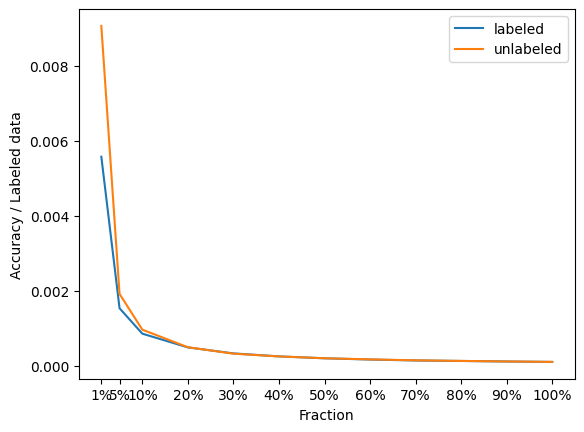

In [35]:
train_size = 9000
acc_by_cost = []
acc_by_cost_un = []
for i in range(len(x)):
    acc_by_cost.append(y_label[i]/ (x[i] * train_size))
    acc_by_cost_un.append(y_unlabeled[i] / (x[i] * train_size))
plt.plot(x, acc_by_cost)
plt.plot(x, acc_by_cost_un)
plt.legend(['labeled', 'unlabeled'])
plt.ylabel('Accuracy / Labeled data')
plt.xlabel('Fraction')
plt.xticks(x, [str(int(100*i)) + '%' for i in x])
plt.savefig('../img/label-vs-unlabel-cost-2.pdf')
plt.show()

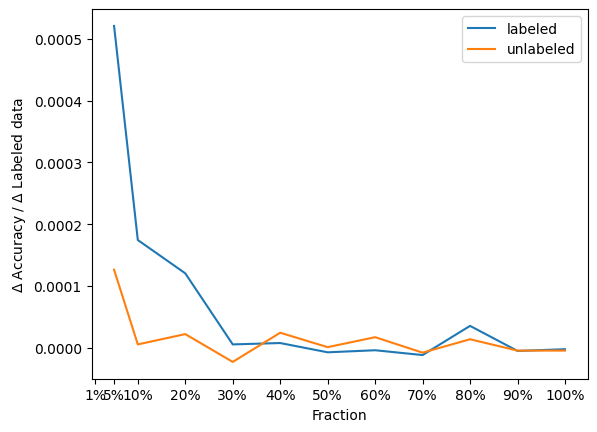

In [36]:
d_acc_d_cost = []
d_acc_d_cost_un = []
for i in range(len(x)-1):
    d_cost = train_size * (x[i+1] - x[i])
    d_acc = y_label[i+1] - y_label[i]
    d_acc_un = y_unlabeled[i+1] - y_unlabeled[i]
    d_acc_d_cost.append(d_acc / d_cost)
    d_acc_d_cost_un.append(d_acc_un / d_cost)
plt.plot(x[1:], d_acc_d_cost)
plt.plot(x[1:], d_acc_d_cost_un)
plt.legend(['labeled', 'unlabeled'])
plt.ylabel('$\Delta$ Accuracy / $\Delta$ Labeled data')
plt.xlabel('Fraction')
plt.xticks(x, [str(int(100*i)) + '%' for i in x])
plt.savefig('../img/label-vs-unlabel-dcost-2.pdf')
plt.show()

# GAN-TEXTGEN-BERT vs GAN-BERT

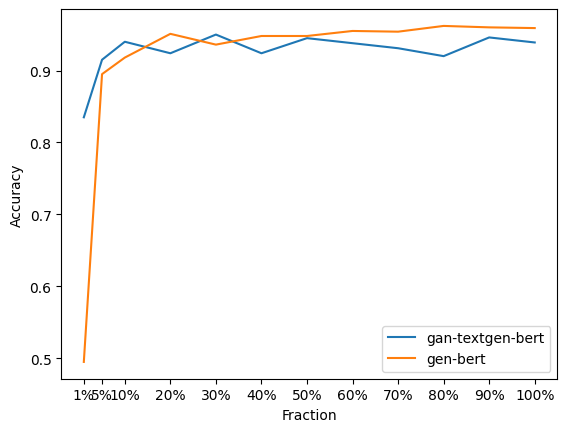

In [4]:
with open('../core/stats/subj/gan-textgen-bert/compare.json', 'r') as f:
    data = json.load(f)

x = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
y_textgen = list(data['gan-textgen-bert'].values())
y_bert = list(data['gen-bert'].values())
plt.plot(x, y_textgen)
plt.plot(x, y_bert)
plt.xticks(x, [str(int(100*i)) + '%' for i in x])
plt.legend(['gan-textgen-bert', 'gen-bert'])
plt.xlabel('Fraction')
plt.ylabel('Accuracy')
plt.savefig('../img/textgen-bert-vs-bert.pdf')
plt.show()

In [8]:
from util.calculate_confidence_interval import calculate_interval
import numpy as np

In [18]:
with open('../core/stats/subj/gan-textgen-bert/compare-interval.json', 'r') as f:
    data = json.load(f)

gan_bert_accs = []
gan_bert_errs = []
for dataset in data['gan-bert']:
    accs = [x['accuracy'] for x in data['gan-bert'][dataset]]
    avg, err = calculate_interval(accs)
    gan_bert_accs.append(avg)
    gan_bert_errs.append(err)

gan_bert_accs = np.array(gan_bert_accs)
gan_bert_errs = np.array(gan_bert_errs)

gan_textgen_accs = []
gan_textgen_errs = []
for dataset in data['gan-textgen-bert']:
    accs = [x['accuracy'] for x in data['gan-textgen-bert'][dataset]]
    avg, err = calculate_interval(accs)
    gan_textgen_accs.append(avg)
    gan_textgen_errs.append(err)

gan_textgen_accs = np.array(gan_textgen_accs)
gan_textgen_errs = np.array(gan_textgen_errs)

In [19]:
x = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

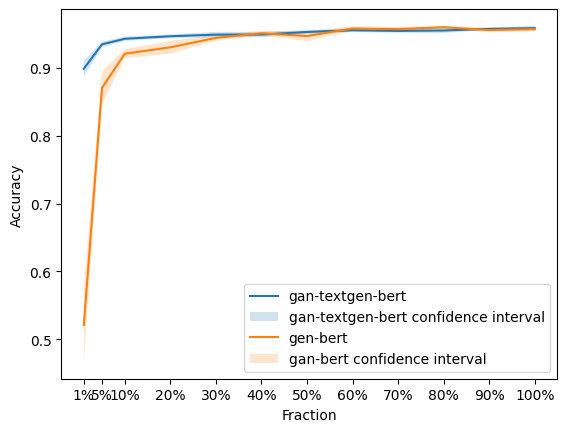

In [35]:
fig, ax = plt.subplots()
ax.plot(x, gan_textgen_accs, '-')
ax.fill_between(x, gan_textgen_accs - gan_textgen_errs, gan_textgen_accs + gan_textgen_errs, alpha=0.2)
ax.plot(x, gan_bert_accs, '-')
ax.fill_between(x, gan_bert_accs - gan_bert_errs, gan_bert_accs + gan_bert_errs, alpha=0.2)
plt.xticks(x, [str(int(100*i)) + '%' for i in x])
plt.legend(['gan-textgen-bert', 'gan-textgen-bert confidence interval', 'gen-bert', 'gan-bert confidence interval'])
plt.xlabel('Fraction')
plt.ylabel('Accuracy')
plt.savefig('../img/textgen-bert-vs-bert-interval.pdf')
plt.show()

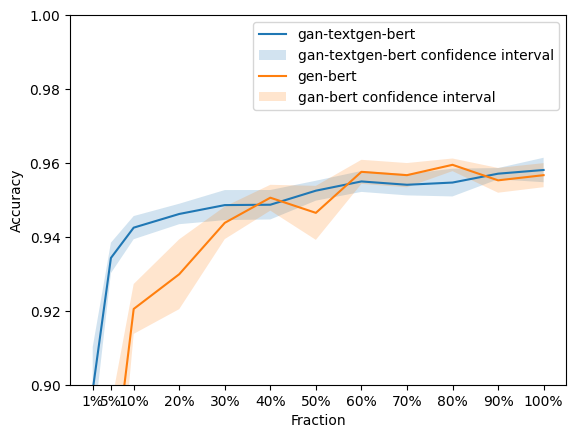

In [34]:
fig, ax = plt.subplots()
ax.plot(x, gan_textgen_accs, '-')
ax.fill_between(x, gan_textgen_accs - gan_textgen_errs, gan_textgen_accs + gan_textgen_errs, alpha=0.2)
ax.plot(x, gan_bert_accs, '-')
ax.fill_between(x, gan_bert_accs - gan_bert_errs, gan_bert_accs + gan_bert_errs, alpha=0.2)
plt.xticks(x, [str(int(100*i)) + '%' for i in x])
plt.legend(['gan-textgen-bert', 'gan-textgen-bert confidence interval', 'gen-bert', 'gan-bert confidence interval'])
plt.xlabel('Fraction')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1)
plt.savefig('../img/textgen-bert-vs-bert-interval-zoom.pdf')
plt.show()